In [20]:
import os
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from scipy.stats import kstest, norm

In [2]:
seeds = [i+1 for i in range(50)]

In [3]:
os.getcwd()

'/Users/jeromeroche/Documents/NUS/Thesis/TP/Continuous_Env/src'

In [4]:
os.chdir('../log_files/wind_map_1/png_continuous_7_1_10_1_propulsion_15_4_0.9_200000/')

In [5]:
bonus = 10
scale = 1
rewards = []
for seed in seeds:
    rewards.append([])
    file = open('seed_'+str(seed)+'/monitoring.txt', 'r')
    if seed == 1:
        ts = []
    for line in file:
        split = line.split()
        rewards[seed - 1].append(float(split[1])/scale - bonus)
        if seed == 1:
            ts.append(int(split[0]))

In [6]:
data = []
for t in range(len(ts)):
    data.append([])
    for x in rewards:
        data[t].append(x[t])

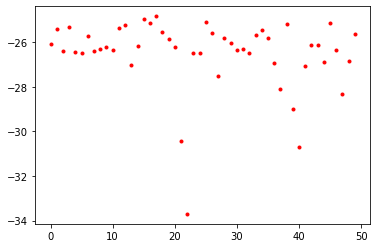

In [15]:
plt.plot(data[-1], '.r')

In [17]:
shapiro_test = stats.shapiro(data[-1])
shapiro_test

ShapiroResult(statistic=0.726498544216156, pvalue=2.5551047500016466e-08)

<AxesSubplot:>

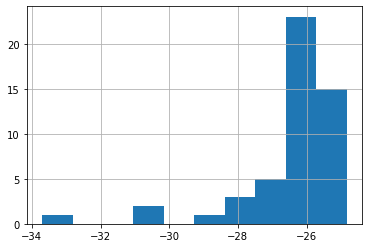

In [19]:
my_data = pd.Series(data[-1])
my_data.hist()

In [21]:
my_data = pd.Series(data[-1])
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

1.0 0.0


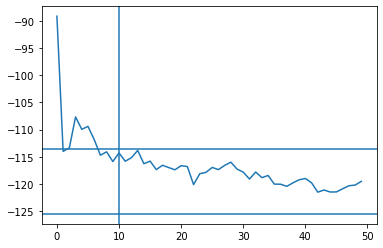

In [49]:
my_data = data[2]
Monte_Carlo = [my_data[0]]*len(my_data)

for i in range(1, len(my_data)):
    Monte_Carlo[i] = (Monte_Carlo[i-1] + my_data[i])
for i in range(len(my_data)):
    Monte_Carlo[i] /= i+1
plt.plot(Monte_Carlo)
plt.axhline(Monte_Carlo[-1]*1.05)
plt.axhline(Monte_Carlo[-1]*0.95)
plt.axvline(10)

In [38]:
1.05*Monte_Carlo[-1]

-27.829934789999985

In [28]:
Monte_Carlo[49]


-26.06552